In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
from scipy import stats
from scipy.stats import linregress

In [3]:
athlete_bio_path = Path("data/Olympic_Athlete_Bio.csv")
athlete_event_results_path = Path("data/Olympic_Athlete_Event_Results.csv")
medal_tally_path = Path("data/Olympic_Games_Medal_Tally.csv")
olympic_results_path = Path("data/Olympic_Results.csv")
olympic_country_path = Path("data/Olympics_Country.csv")
olympic_games_path = Path("data/Olympics_Games.csv")

In [4]:
athlete_bio = pd.read_csv(athlete_bio_path)
athlete_event_results = pd.read_csv(athlete_event_results_path)
medal_tally = pd.read_csv(medal_tally_path)
olympic_results = pd.read_csv(olympic_results_path)
olympic_country = pd.read_csv(olympic_country_path)
olympic_games = pd.read_csv(olympic_games_path)

In [5]:
athlete_event_results[['year', 'season', 'olympics']] = athlete_event_results['edition'].str.split(' ', expand=True, n=2)

In [6]:
Exclude_year = ['1906']
error_year_df = athlete_event_results[~athlete_event_results['year'].str.contains('|'.join(Exclude_year), case=False)]

In [7]:
Exclude_strings = ['Winter', 'Intercalated', 'Equestrian']
summer_only_df = error_year_df[~error_year_df['season'].str.contains('|'.join(Exclude_strings), case=False)]
summer_only_df.drop(columns = ['edition', 'edition_id', 'result_id', 'pos','isTeamSport', 'olympics'], inplace=True)


C:\Users\karen\AppData\Local\Temp\ipykernel_14256\1819182949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_only_df.drop(columns = ['edition', 'edition_id', 'result_id', 'pos','isTeamSport', 'olympics'], inplace=True)


In [8]:
trial_only_df = summer_only_df.loc[(summer_only_df['year'] == "1900")]
trial_only_df["event"].nunique()

226

In [9]:
year_list = summer_only_df['year'].unique()
unique_events = summer_only_df[['event','year']].drop_duplicates()["year"].value_counts()


data = {
     'total olympic events' : unique_events
          }
events_df = pd.DataFrame(data)

total_df = events_df.sort_values("year", ascending=True)


In [10]:
exclude_error = ['226', '164']
total_df['total olympic events'] = total_df['total olympic events'].astype(str)
total_oly_df = total_df[~total_df['total olympic events'].str.contains('|'.join(exclude_error), case=False)]
total_oly_df

,total olympic events
year,
1896,43
1908,107
1912,105
1920,147
1924,134
1928,118
1932,123
1936,141
1948,142


In [11]:
total_oly_df['total olympic events'] = total_oly_df['total olympic events'].astype(int)
changes = []
for i in range(1, len(total_oly_df)):
    change = total_oly_df.iloc[i]['total olympic events'] - total_oly_df.iloc[i-1]['total olympic events']
    changes.append(change)
total_oly_df['changes'] = [0] + changes
total_oly_df


C:\Users\karen\AppData\Local\Temp\ipykernel_14256\3282286825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_oly_df['total olympic events'] = total_oly_df['total olympic events'].astype(int)
C:\Users\karen\AppData\Local\Temp\ipykernel_14256\3282286825.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_oly_df['changes'] = [0] + changes


,total olympic events,changes
year,,
1896,43,0
1908,107,64
1912,105,-2
1920,147,42
1924,134,-13
1928,118,-16
1932,123,5
1936,141,18
1948,142,1


In [12]:
del total_oly_df['total olympic events']

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, '1896'),
  Text(1, 0, '1908'),
  Text(2, 0, '1912'),
  Text(3, 0, '1920'),
  Text(4, 0, '1924'),
  Text(5, 0, '1928'),
  Text(6, 0, '1932'),
  Text(7, 0, '1936'),
  Text(8, 0, '1948'),
  Text(9, 0, '1952'),
  Text(10, 0, '1956'),
  Text(11, 0, '1960'),
  Text(12, 0, '1964'),
  Text(13, 0, '1968'),
  Text(14, 0, '1972'),
  Text(15, 0, '1976'),
  Text(16, 0, '1980'),
  Text(17, 0, '1984'),
  Text(18, 0, '1988'),
  Text(19, 0, '1992'),
  Text(20, 0, '1996'),
  Text(21, 0, '2000'),
  Text(22, 0, '2004'),
  Text(23, 0, '2008'),
  Text(24, 0, '2012'),
  Text(25, 0, '2016'),
  Text(26, 0, '2020')])

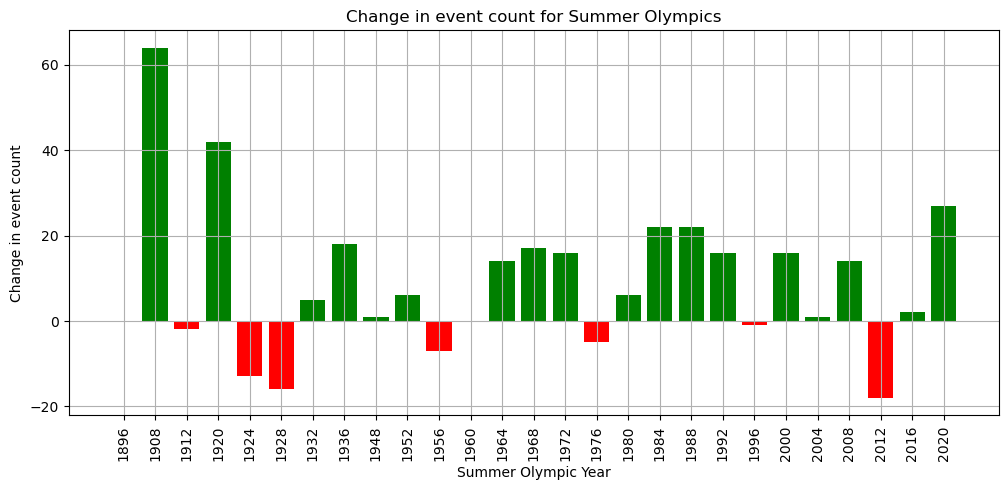

In [38]:
plt.figure(figsize=(12, 5))
years = total_oly_df.index
event_count_changes = total_oly_df["changes"]
colors = ['red' if value < 0 else 'green' for value in event_count_changes]
plt.bar(years, event_count_changes, color=colors)
plt.title("Change in event count for Summer Olympics")
plt.xlabel("Summer Olympic Year")
plt.ylabel("Change in event count")
plt.grid(True)
plt.xticks(rotation = 90)

In [14]:
first_olympics = summer_only_df.loc[(summer_only_df["year"]) == "1908"]
first_olympics["event"].nunique()

107

In [15]:
gold_first = first_olympics.loc[(first_olympics["medal"] == "Gold")]

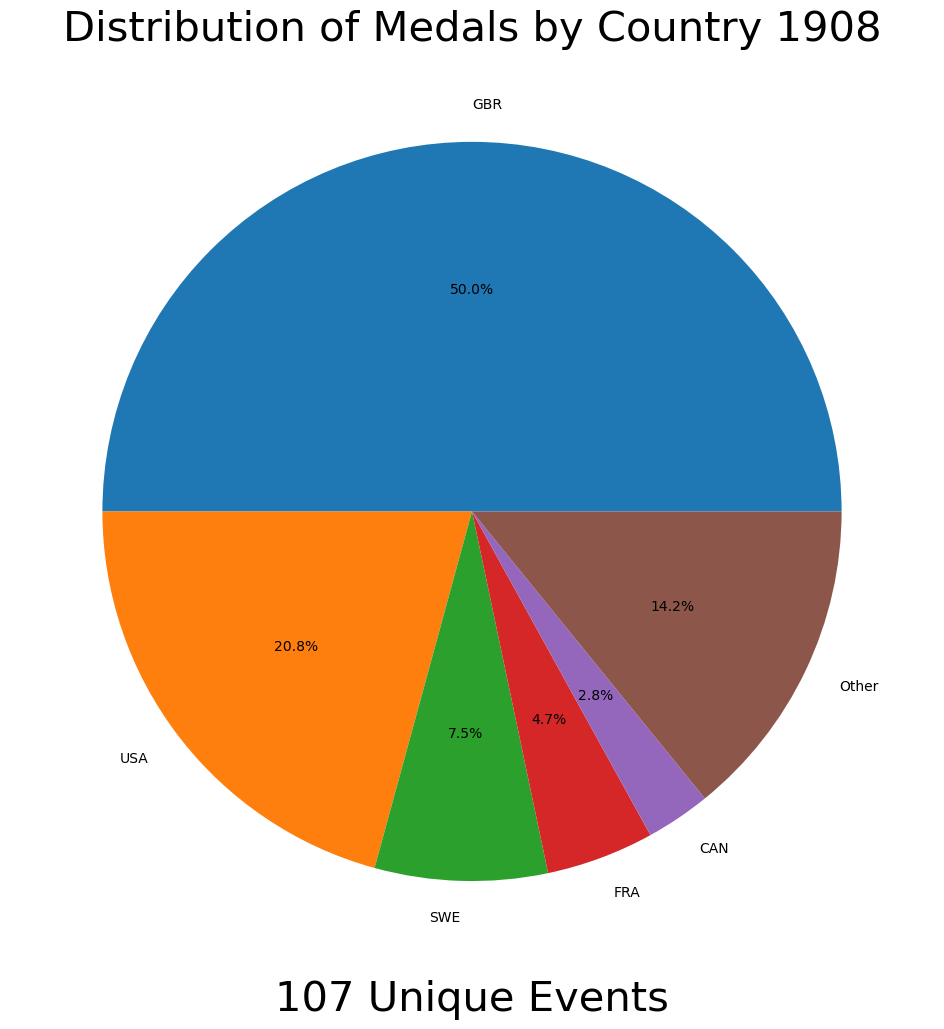

In [16]:
total_medals = gold_first[['event', 'country_noc']].drop_duplicates()["country_noc"].value_counts()
top_countries = total_medals.nlargest(5)
total_gold = total_medals.sum()
other_gold = total_gold - top_countries.sum()
other_series = pd.Series({"Other": other_gold})
final_data = pd.concat([top_countries, other_series])
plt.figure(figsize=(12, 12))
final_data.plot(kind='pie', color="blue", autopct="%1.1f%%")
plt.title("Distribution of Medals by Country 1908", fontsize = 30)
plt.xlabel("107 Unique Events", fontsize = 30)
plt.show()

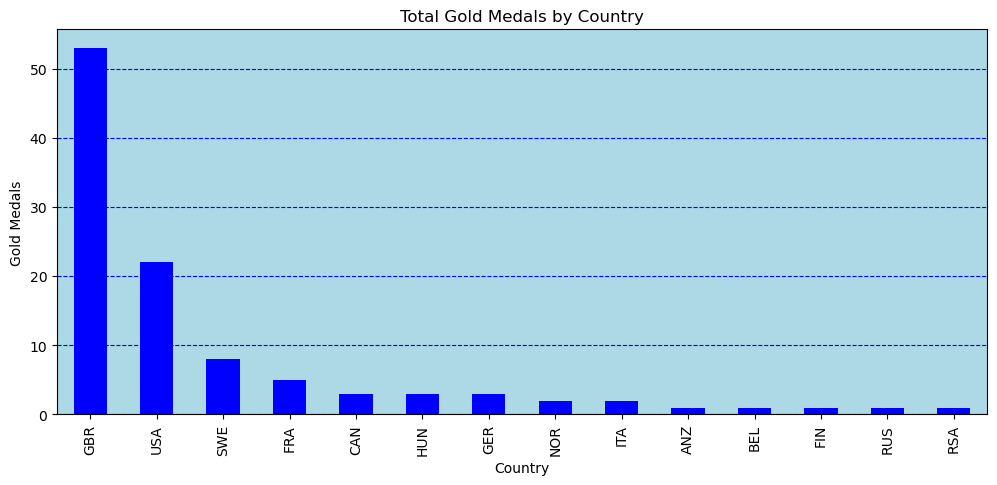

In [17]:
plt.figure(figsize=(12, 5))
total_medals.plot(kind='bar', color = "blue")
plt.xlabel("Country")
plt.ylabel("Gold Medals")
plt.title("Total Gold Medals by Country")
plt.grid(axis='y', linestyle='--', color = "blue")
plt.gca().set_facecolor('lightblue')

In [18]:
comparison_olympics = summer_only_df.loc[(summer_only_df["year"]) == "2020"]
comparison_olympics["event"].nunique()

290

In [19]:
gold_comparison = comparison_olympics.loc[(comparison_olympics["medal"] == "Gold")]


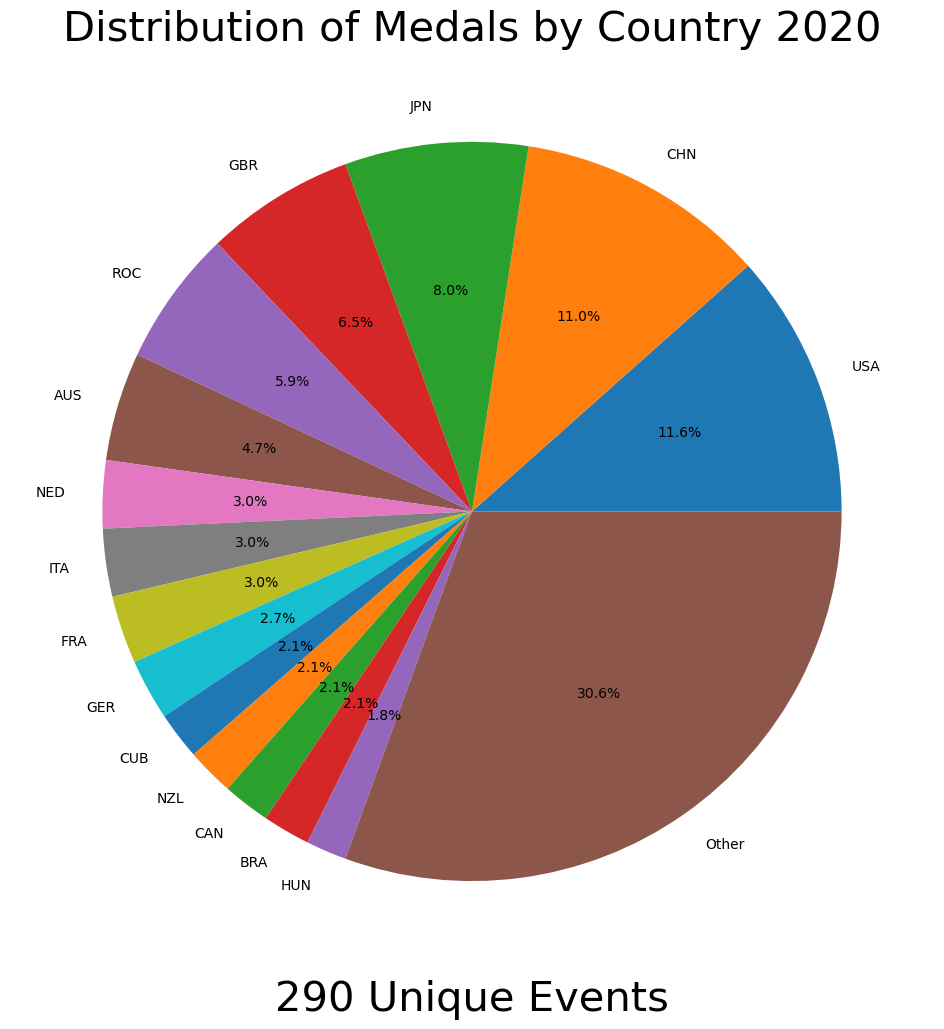

In [20]:
total_modern_medals = gold_comparison[['event', 'country_noc']].drop_duplicates()["country_noc"].value_counts()
top_countries = total_modern_medals.nlargest(15)
total_gold = total_modern_medals.sum()
other_gold = total_gold - top_countries.sum()
other_series = pd.Series({"Other": other_gold})
final_data = pd.concat([top_countries, other_series])
plt.figure(figsize=(12, 12))
final_data.plot(kind='pie', color="blue", autopct="%1.1f%%")
plt.title("Distribution of Medals by Country 2020", fontsize = 30)
plt.xlabel("290 Unique Events", fontsize = 30)
plt.show()

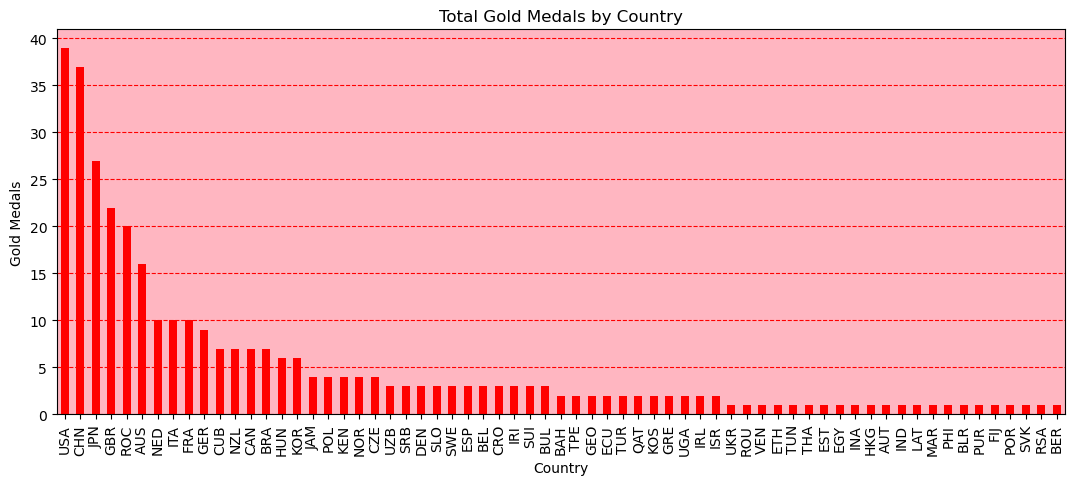

In [21]:
plt.figure(figsize=(13, 5))
total_modern_medals.plot(kind='bar', color = "red")
plt.xlabel("Country")
plt.ylabel("Gold Medals")
plt.title("Total Gold Medals by Country")
plt.grid(axis='y', linestyle='--', color = "red")

plt.gca().set_facecolor('lightpink')

Text(0.5, 1.0, 'Unique Events for Summer Olympics')

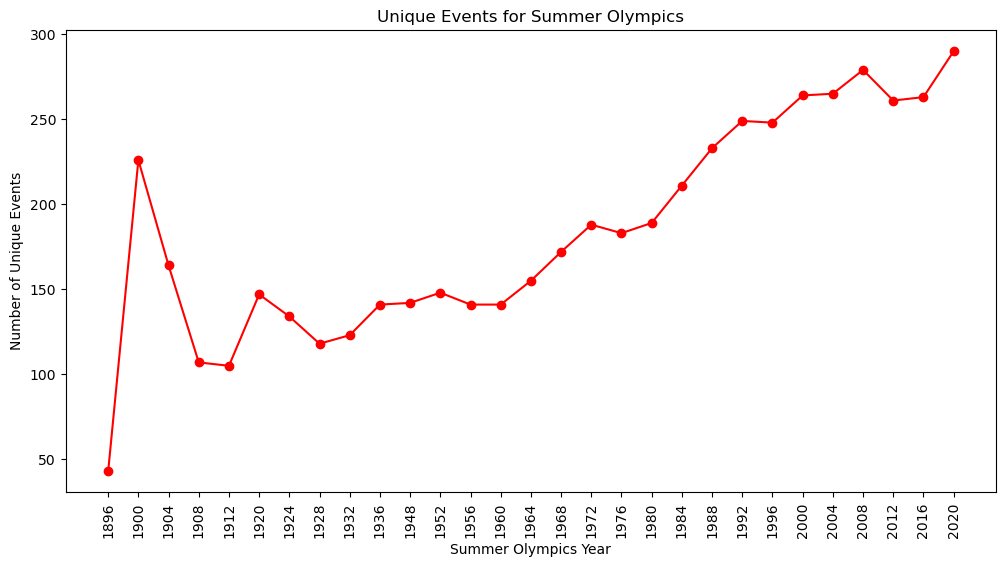

In [22]:
events_total = summer_only_df.groupby("year")["event"].nunique()
year_of_event = events_total.index
x_value = year_of_event
y_value = events_total
plt.figure(figsize=(12, 6))
plt.plot(x_value, y_value, color='red', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Summer Olympics Year')
plt.ylabel('Number of Unique Events')
plt.title('Unique Events for Summer Olympics')